In [71]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [52]:
data = pd.read_csv('../excercises/Data/diabetes.csv', index_col=0)

In [53]:
#checking for null-values
data.isnull().sum()
#0 null-values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
#idea of general looks of data
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [55]:
#Judging from where the data is from, the SkinThickness parameter doesnt seem relevant
#The reason for this, is because it's taken from triceps skin thickness, which doesn't necessarily mean they have high -
#skin thickness all over the body. 

In [79]:
#removing skinthickness for now, might do more tinkering with the parameters later.
#datafiltered=data.loc[:, ~data.columns.isin(['SkinThickness'])]
datafiltered=data


In [80]:
#as the parameter DiabetesPedigreeFunction is such a long typing process a variable is instanciated instead
DPF='DiabetesPedigreeFunction'

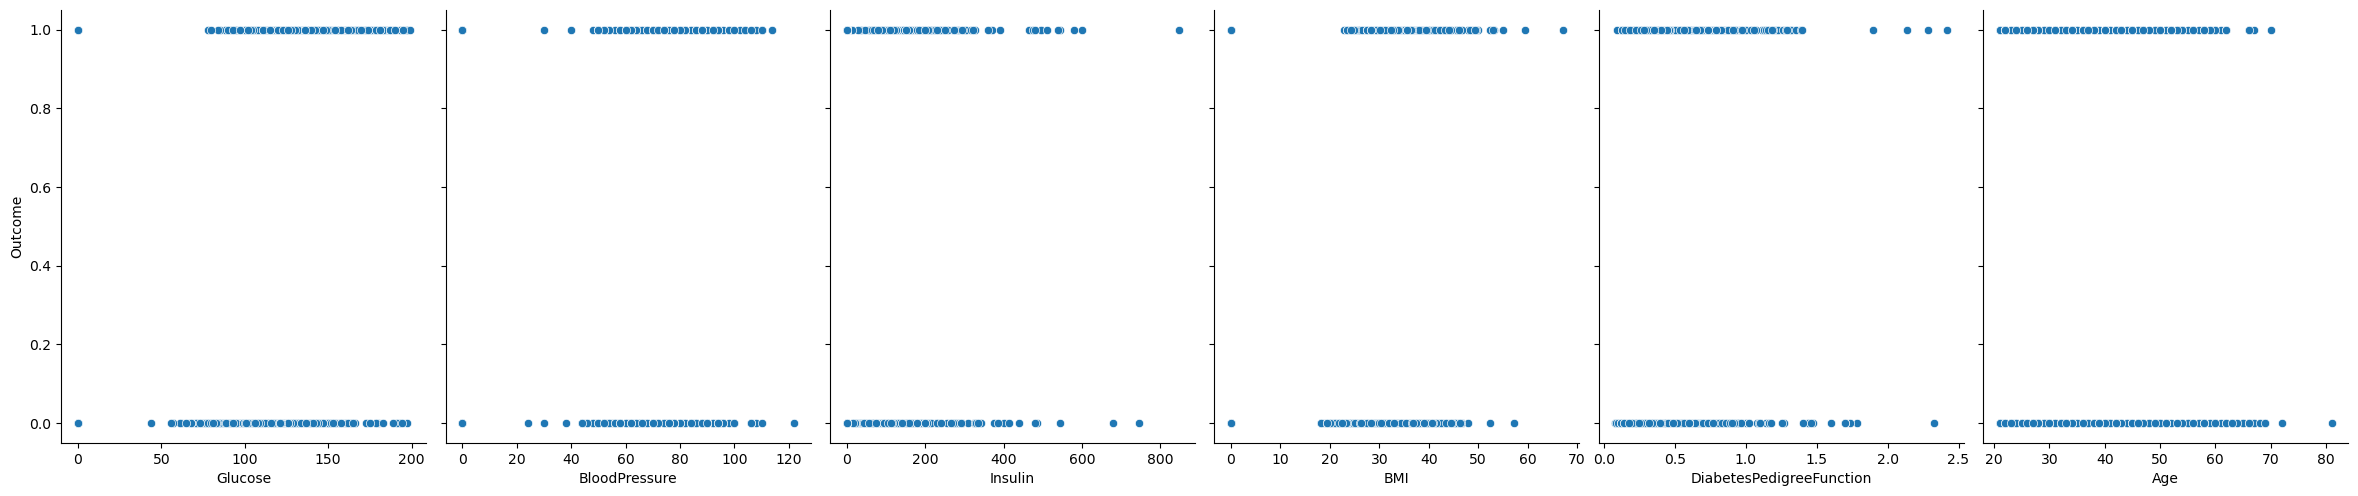

In [58]:
#Trying to see if we get any value of using Outcome as y
sns.pairplot(datafiltered, x_vars=['Glucose','BloodPressure','Insulin','BMI',DPF,'Age'], y_vars='Outcome', height=5, aspect=0.8)


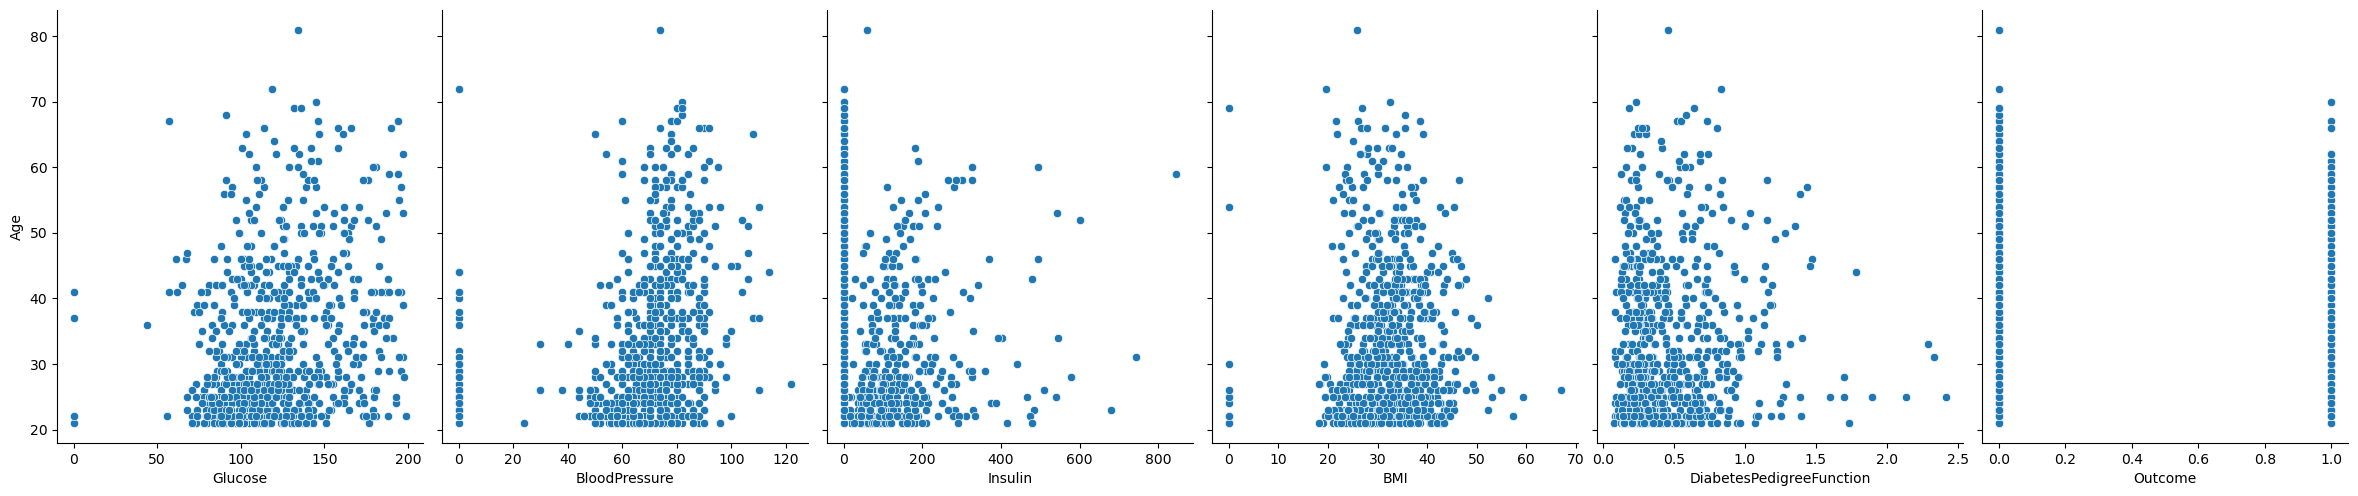

In [59]:
#trying with age instead as y
sns.pairplot(datafiltered, x_vars=['Glucose','BloodPressure','Insulin','BMI',DPF,'Outcome'], y_vars='Age', height=5, aspect=0.8)


In [60]:
#Making a median bloodpressure and BMI, as there's some 0-values (not null values!) and replacing them in the dataframe
median_blood_pressure = datafiltered[datafiltered['BloodPressure'] != 0]['BloodPressure'].median()

datafiltered['BloodPressure'] = datafiltered['BloodPressure'].replace(0, median_blood_pressure)

median_BMI = datafiltered[datafiltered['BMI'] != 0]['BMI'].median()

datafiltered['BMI'] = datafiltered['BMI'].replace(0, median_BMI)

C:\Users\Johan\AppData\Local\Temp\ipykernel_26276\1550732554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafiltered['BloodPressure'] = datafiltered['BloodPressure'].replace(0, median_blood_pressure)
C:\Users\Johan\AppData\Local\Temp\ipykernel_26276\1550732554.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafiltered['BMI'] = datafiltered['BMI'].replace(0, median_BMI)


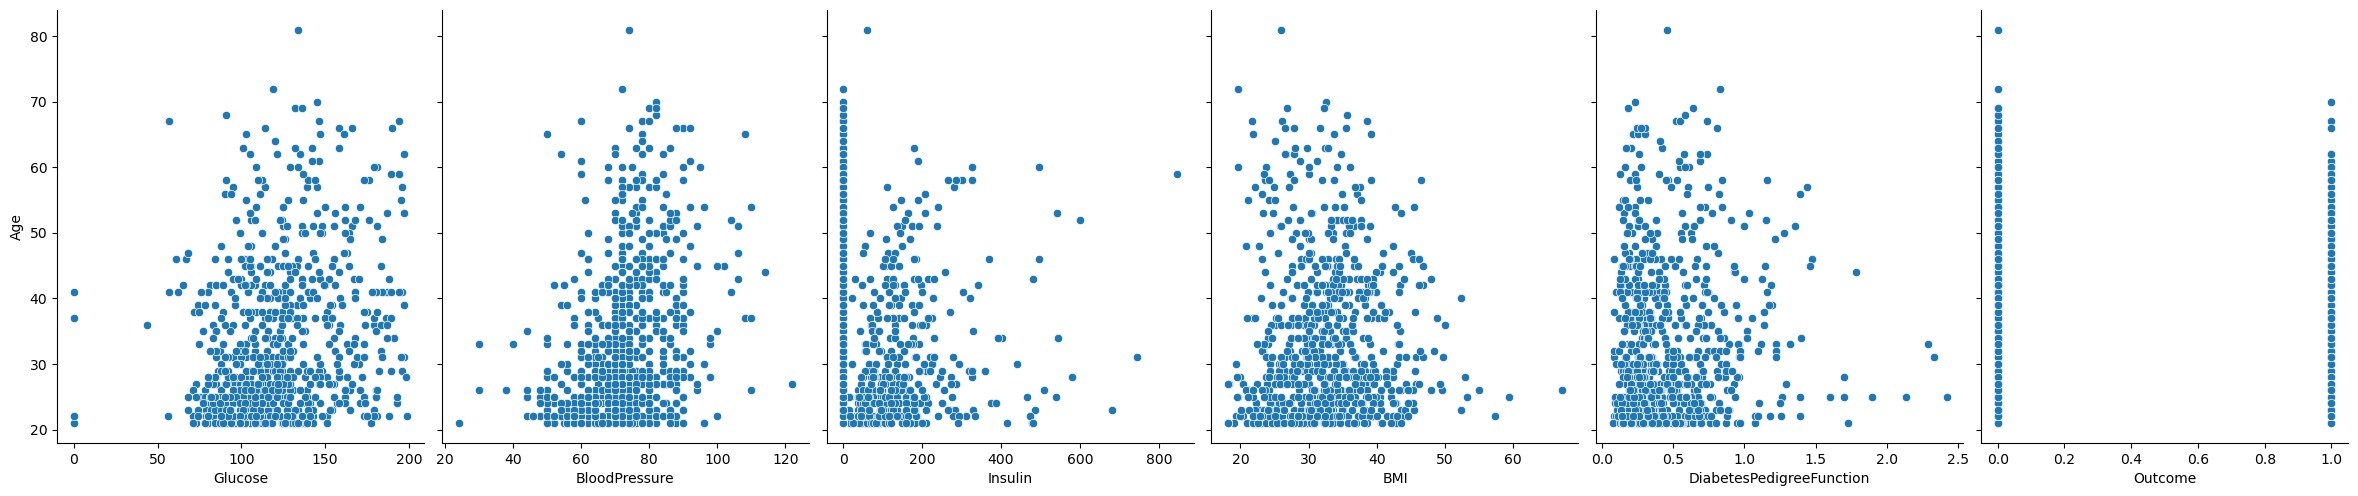

In [61]:
sns.pairplot(datafiltered, x_vars=['Glucose','BloodPressure','Insulin','BMI',DPF,'Outcome'], y_vars='Age', height=5, aspect=0.8)
#Looks better now. The outcome might have to removed looking at the data, but it's kept for now

In [ ]:
corr_matrix = data.corr()
corr_matrix2 = datafiltered.corr()

In [ ]:
sns.heatmap(corr_matrix2, annot=True)

<Axes: >

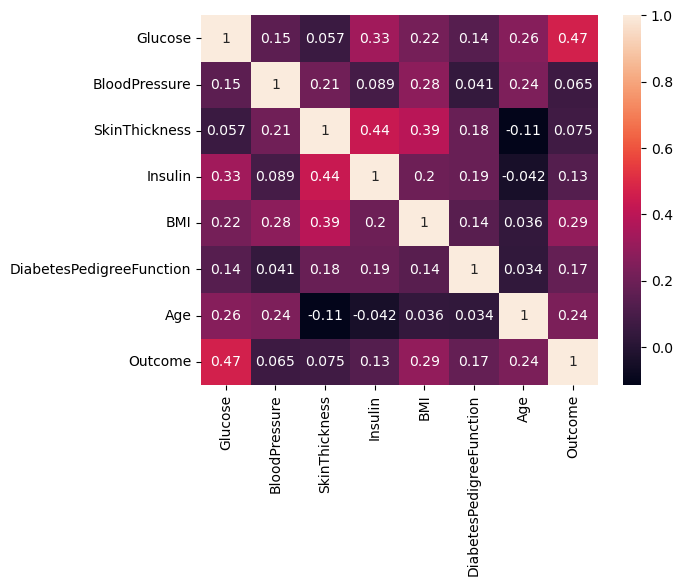

In [105]:
sns.heatmap(corr_matrix, annot=True)

In [106]:
# create a Python list of feature names
feature_cols = ['Glucose','SkinThickness','BloodPressure','Insulin','BMI',DPF,'Age']
# use the list to select a subset of the original DataFrame
X = datafiltered[feature_cols]
# print the first 5 rows
X.head()



,Glucose,SkinThickness,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
Pregnancies,,,,,,
6,148,35,72,0,33.6,0.627
1,85,29,66,0,26.6,0.351
8,183,0,64,0,23.3,0.672
1,89,23,66,94,28.1,0.167
0,137,35,40,168,43.1,2.288


In [107]:
y = datafiltered['Outcome']

# equivalent command that works if there are no spaces in the column name
y = datafiltered.Outcome

# print the first 5 values
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [109]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [110]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = -0.7962232480497262
bi = [ 0.00658964 -0.00110809 -0.00163444 -0.00016553  0.01391863  0.10449294]


In [111]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('Glucose', 0.006589641351799595),
 ('SkinThickness', -0.0011080894953546976),
 ('BloodPressure', -0.0016344354523313042),
 ('Insulin', -0.00016553356179591487),
 ('BMI', 0.013918625937928766),
 ('DiabetesPedigreeFunction', 0.10449293718858706)]

In [112]:
y_predicted = linreg.predict(X_test)


In [113]:
print(metrics.mean_absolute_error(y_test, y_predicted))

0.33923085581590356


In [114]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

0.16781703311724464


In [115]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

0.4096547730922278


In [116]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.27


In [117]:
r2_score(y_test, y_predicted)

0.271072568771756